# 導入所需函示庫

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1:
Use the linear model y = 2x +ε with zero-mean Gaussian noise ε∼ N(0, 1) to generate 15 data points with (equal spacing) x ∈ [−3, 3].


In [ ]:
def q1_data_generator():
  np.random.seed(0)
  x = np.linspace(-3, 3, 15)
  epsilon = np.random.normal(0, 1, 15)
  y = (2 * x + epsilon)
  return x, y

print(q1_data_generator())

(array([-3.        , -2.57142857, -2.14285714, -1.71428571, -1.28571429,
       -0.85714286, -0.42857143,  0.        ,  0.42857143,  0.85714286,
        1.28571429,  1.71428571,  2.14285714,  2.57142857,  3.        ]), array([-4.23594765, -4.74269993, -3.3069763 , -1.18767823, -0.70387058,
       -2.69156359,  0.09294556, -0.15135721,  0.75392401,  2.12488422,
        2.71547214,  4.88284494,  5.04675201,  5.26453216,  6.44386323]))


# Question 2:
Perform Linear Regression. Show the fitting plot, the training error, and the five-fold cross-validation errors.

## Linear regression
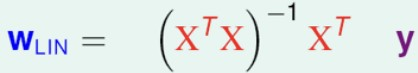

In [ ]:
def linear_regression(x_label, y_label):        # Do linear regression
    w_0_coef = np.ones((1, x_label.size))     # Initial weight setting
    x = np.vstack([x_label, w_0_coef]).T
    w = np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T), y_label.T)
    return x, w

## error calculation
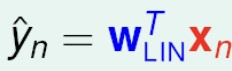



*   求y_hat
*   求均方誤差，用於training error


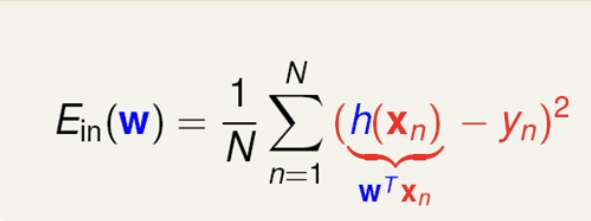

In [ ]:
def error_calculation(x, y, w):                     # Calculate training error
    n = x.shape[0]
    error = np.linalg.norm(np.dot(x, w) - y)**2 / n
    return error

## five-fold cross-validation error 
**iteration_0:**

valid:[x0, x1, x2]

train:([x3, x4, x5], [x6, x7, x8], [x9, x10, x11], [x12, x13, x14])

**iteration_1:**

valid:[x3, x4, x5]

train:([x0, x1, x2], [x6, x7, x8], [x9, x10, x11], [x12, x13, x14])

**依此類推**

In [ ]:
def fivefold_lin(x, y):                         # Calculate average five-fold cross-validation error
    fold_num = int(len(x)/5)
    error_sum = 0
    for i in range(5):
      x_valid = x[i * fold_num: i * fold_num + fold_num]
      x_train = np.vstack([x[:i * fold_num], x[i * fold_num + fold_num:]]) 
      y_valid = y[i * fold_num: i * fold_num + fold_num]
      y_train = np.append(y[:i * fold_num], y[i * fold_num + fold_num:])
      w = np.dot(np.dot(np.linalg.pinv(np.dot(x_train.T, x_train)), x_train.T), y_train.T)
      predict=np.dot(x_valid, w)

      #設定預測結果子圖
      x_val=[]
      for j in range(fold_num):
        x_val=np.append(x_val,(i*fold_num+j)*(8/len(x))-4)
      x_c = np.linspace(-4, 4)
      func = np.poly1d(w)
      y_c = func(x_c)
      ax = plt.subplot(2, 3, i+1)
      ax.set_xlim([-4, 4])
      ax.set_ylim([-8, 8])
      plt.scatter(x_val, y_valid, s=12, marker="o", c='b')
      plt.plot(x_c, y_c, c='orange')
      #plt.legend(["GT","Predict"])
      plt.title('Fold  '+ str(i+1))

      error_sum += np.linalg.norm(predict - y_valid)**2 / x_valid.shape[0]
    return error_sum/5

## Q2 Main Function

Training error is 0.6274139324428417.


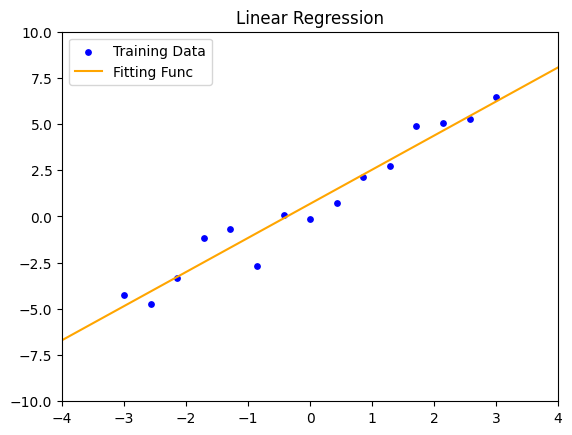

Five-fold cross-validation error is 0.7014420946409669


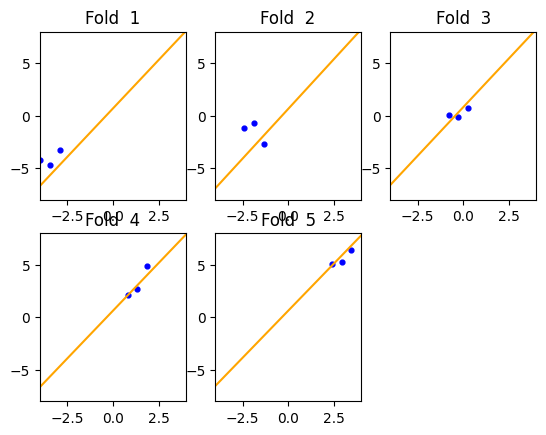

In [ ]:
def draw_img_q2(x, y, w):
  plt.title("Linear Regression")
  plt.xlim(-4, 4)
  plt.ylim(-10, 10)
  plt.scatter(x_data, y_data, s=15, marker="o", c='b')
  x_c = np.linspace(-4, 4)
  func = np.poly1d(w_matrix)
  y_c = func(x_c)
  plt.plot(x_c, y_c, c='orange')
  plt.legend(["Training Data", "Fitting Func"])
  plt.show()

if __name__ == '__main__':
  x_data, y_data = q1_data_generator()              # data generation using answer_1
  x_matrix, w_matrix = linear_regression(x_data, y_data)     # Do linear regression
  print('Training error is {t_error}.'.format(t_error = error_calculation(x_matrix,y_data,w_matrix)))
  draw_img_q2(x_matrix, y_data, w_matrix)
  print('Five-fold cross-validation error is {ff_error}'.format(ff_error = fivefold_lin(x_matrix,y_data)))
  plt.show()


  

# Question 3:
Perform Polynomial Regression with degree 5, 10 and 14, respectively. For each case, show the fitting plot, the training error, and the five-fold cross-validation errors. (Hint: Arrange the polynomial regression equation as follows and solve the model parameter
vector w.)

## 提升原始資料維度
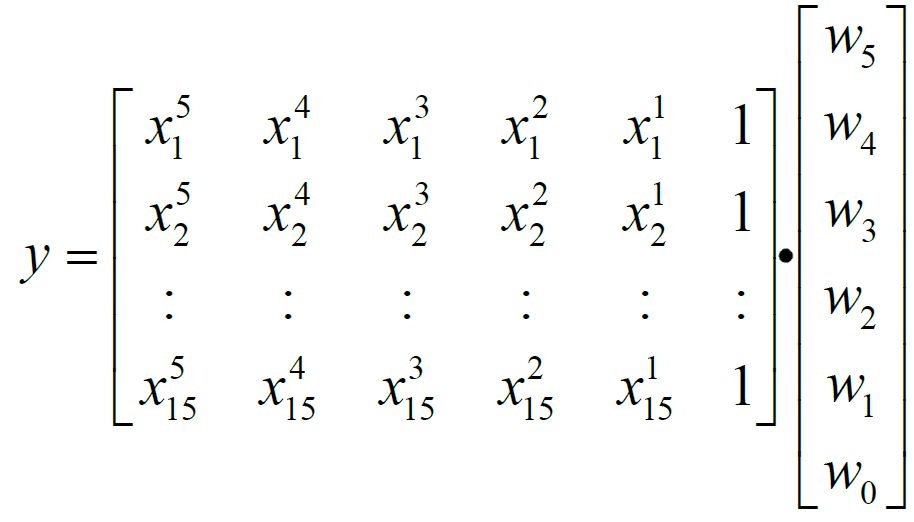

### polynomial regression 使用Hint(上圖)

In [ ]:
def poly_regression(x_data, y_data, degree):
    w_0 = np.ones((1, x_data.size))
    x = np.vstack([x_data, w_0])
    for i in range(1, degree):
        temp = np.power(x_data, i+1)
        x = np.vstack([temp, x])
    x = x.T
    w = np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T), y_data.T)
    return x, w

## Q3 Main Function

Training error with degree 5 is: 0.5111753662147285


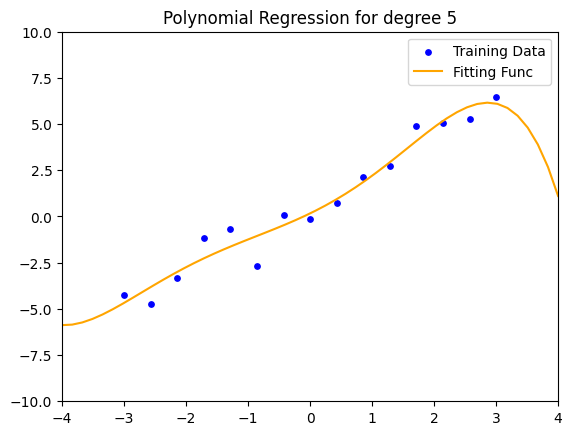

Five-fold cross-validation errors is: 12.354290097403624


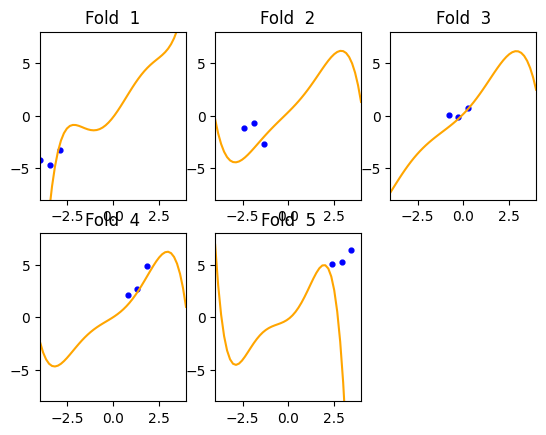

Training error with degree 10 is: 0.20152074678333048


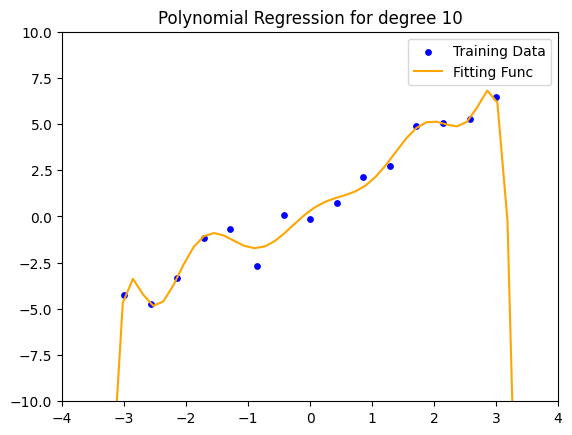

Five-fold cross-validation errors is: 40255020.259146206


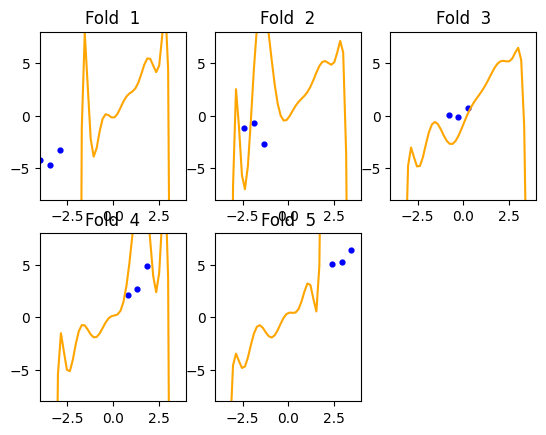

Training error with degree 14 is: 0.17648423677188113


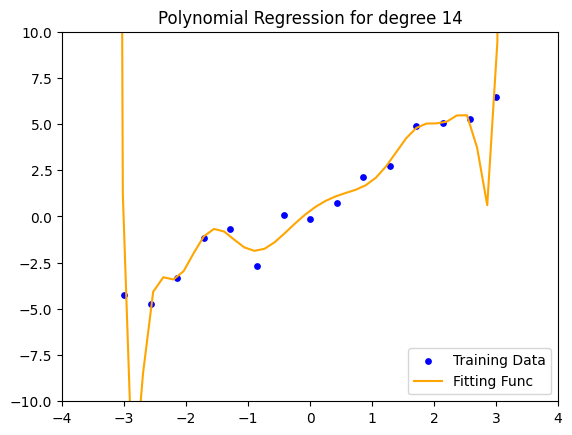

Five-fold cross-validation errors is: 54080038626.66248


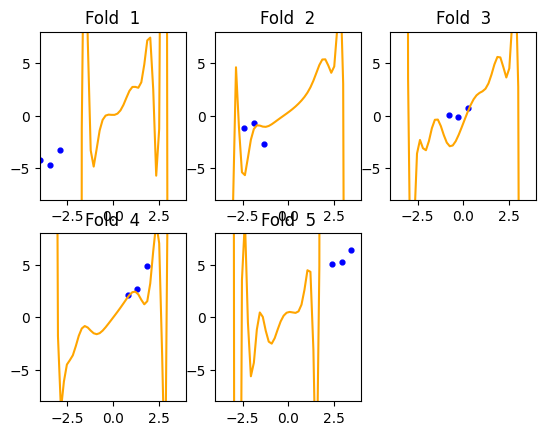

In [ ]:
def draw_img_Q3(x, y, w, deg):           
    plt.title("Polynomial Regression for degree "+str(deg))
    plt.xlim(-4, 4)
    plt.ylim(-10, 10)
    plt.scatter(x, y, s=15, c='b')
    x_c = np.linspace(-4, 4)
    func = np.poly1d(w)
    y_c = func(x_c)
    plt.plot(x_c, y_c, c='orange')
    plt.legend(["Training Data", "Fitting Func"])
    plt.show()

if __name__ == '__main__':
  x_data, y_data = q1_data_generator()
  x_matrix, w_matrix = poly_regression(x_data, y_data, 5)
  print("Training error with degree 5 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q3(x_data, y_data, w_matrix, 5)
  print("Five-fold cross-validation errors is: " + str(fivefold_lin(x_matrix, y_data)))
  plt.show()

  x_matrix, w_matrix = poly_regression(x_data, y_data, 10)
  print("Training error with degree 10 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q3(x_data, y_data, w_matrix, 10)
  print("Five-fold cross-validation errors is: " + str(fivefold_lin(x_matrix, y_data)))
  plt.show()

  x_matrix, w_matrix = poly_regression(x_data, y_data, 14)
  print("Training error with degree 14 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q3(x_data, y_data, w_matrix, 14)
  print("Five-fold cross-validation errors is: " + str(fivefold_lin(x_matrix, y_data)))
  

# Question 4:
Change the model to y = sin(2πx) +ε  with the noise ε∼ N(0, 0.04) and (equal spacing) x ∈ [0, 1]. Then repeat those stated in 2) and 3). Compare the results with linear/polynomial regression on different datasets.

## 生成新資料

In [ ]:
def q4_data_generator():
  np.random.seed(0)
  x = np.linspace(0, 1, 15)
  epsilon = np.random.normal(0, 0.04, 15)
  y = np.sin(2 * np.pi * x) + epsilon
  return x, y

print(q4_data_generator())

(array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]), array([ 0.07056209,  0.44989003,  0.820981  ,  1.06456364,  1.04963023,
        0.74274037,  0.47188728, -0.00605429, -0.43801249, -0.76540754,
       -0.96916617, -0.91675697, -0.75138997, -0.42901674,  0.01775453]))


## five-fold cross-validation error for Question 4,5


In [ ]:
def fivefold_poly(x, y):                         # Calculate average five-fold cross-validation error
    fold_num = int(len(x)/5)
    error_sum = 0
    for i in range(5):
      x_valid = x[i * fold_num: i * fold_num + fold_num]
      x_train = np.vstack([x[:i * fold_num], x[i * fold_num + fold_num:]]) 
      y_valid = y[i * fold_num: i * fold_num + fold_num]
      y_train = np.append(y[:i * fold_num], y[i * fold_num + fold_num:])
      w = np.dot(np.dot(np.linalg.pinv(np.dot(x_train.T, x_train)), x_train.T), y_train.T)
      predict=np.dot(x_valid, w)

      #設定預測結果子圖
      x_val=[]
      for j in range(fold_num):
        x_val=np.append(x_val,(i*fold_num+j)*(1/len(x)))
      x_c = np.linspace(-4, 4)
      func = np.poly1d(w)
      y_c = func(x_c)
      ax = plt.subplot(2, 3, i+1)
      ax.set_xlim([0, 1])
      ax.set_ylim([-6, 6])
      plt.scatter(x_val, y_valid, s=12, marker="o", c='b')
      plt.plot(x_c, y_c, c='orange')
      #plt.legend(["GT","Predict"])
      plt.title('Fold  '+ str(i+1))

      error_sum += np.linalg.norm(predict - y_valid)**2 / x_valid.shape[0]
    return error_sum/5

## Q4 Main Function

Training error is: 0.24411240418714794


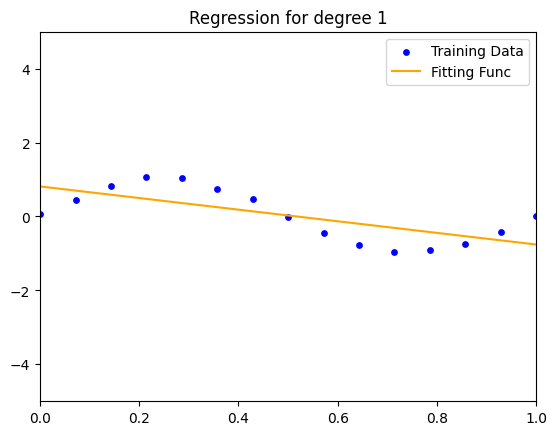

Average of five-fold cross-validation errors is: 0.551414192586489


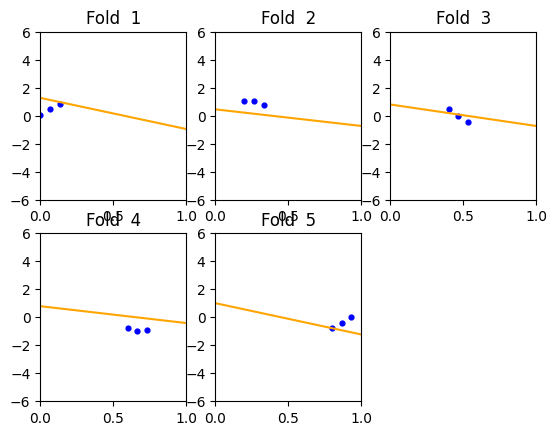

Training error with degree 5 is: 0.0007877369484707883


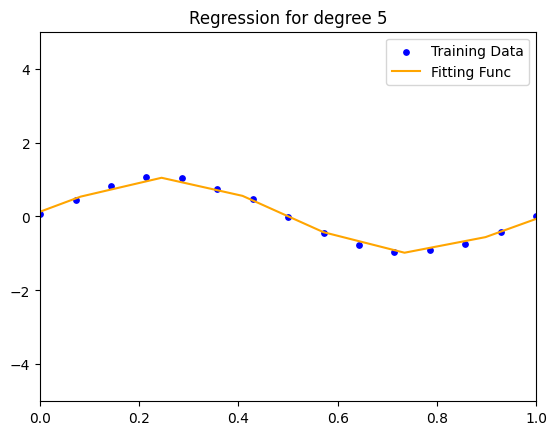

Average of five-fold cross-validation errors is: 0.007950118637072968


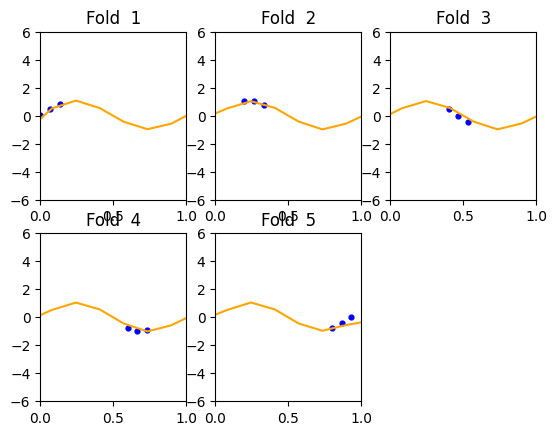

Training error with degree 10 is: 0.0004492980342009797


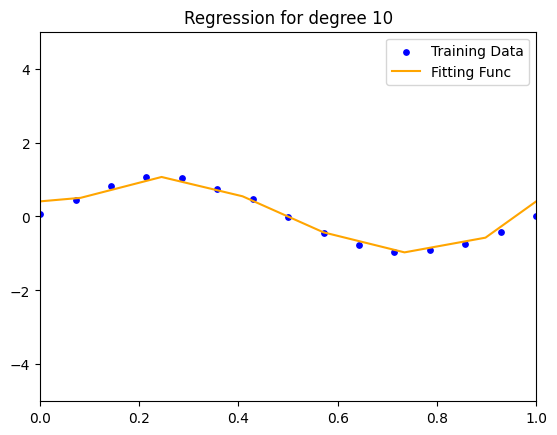

Average of five-fold cross-validation errors is: 3565.19155366751


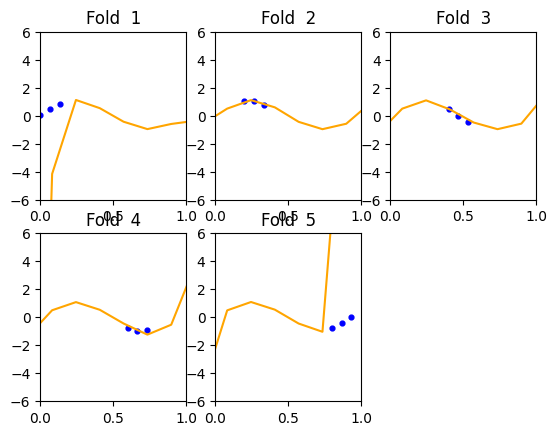

Training error with degree 14 is: 0.0003203965309029726


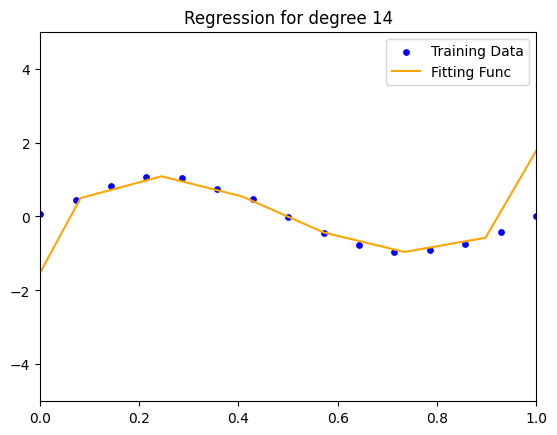

Average of five-fold cross-validation errors is: 8601.752176048109


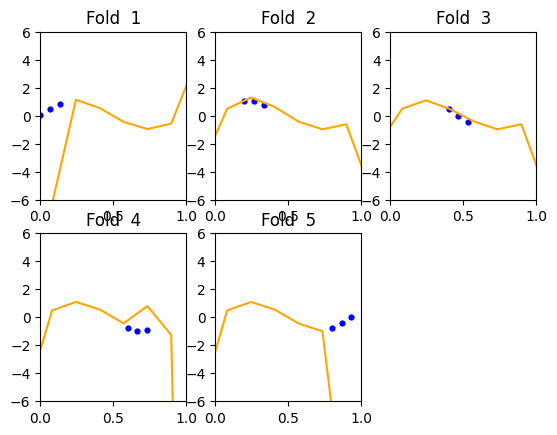

In [ ]:
def draw_img_Q4(x, y, w, deg):           
    plt.title("Regression for degree "+str(deg))
    plt.xlim(0, 1)
    plt.ylim(-5, 5)
    plt.scatter(x, y, s=15, c='b')
    x_c = np.linspace(-4, 4)
    func = np.poly1d(w)
    y_c = func(x_c)
    plt.plot(x_c, y_c, c='orange')
    plt.legend(["Training Data", "Fitting Func"])
    plt.show()

if __name__ == '__main__':
  x_data, y_data = q4_data_generator() 
  x_matrix, w_matrix = linear_regression(x_data, y_data)
  print("Training error is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q4(x_data, y_data, w_matrix, 1)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_poly(x_matrix, y_data)))
  plt.show()

  x_matrix, w_matrix = poly_regression(x_data, y_data, 5)
  print("Training error with degree 5 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q4(x_data, y_data, w_matrix, 5)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_poly(x_matrix, y_data)))
  plt.show()

  x_matrix, w_matrix = poly_regression(x_data, y_data, 10)
  print("Training error with degree 10 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q4(x_data, y_data, w_matrix, 10)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_poly(x_matrix, y_data)))
  plt.show()

  x_matrix, w_matrix = poly_regression(x_data, y_data, 14)
  print("Training error with degree 14 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q4(x_data, y_data, w_matrix, 14)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_poly(x_matrix, y_data)))
  plt.show()

# Question 5:
Following 4), perform polynomial regression with degree 14 by varying the number of
training data points m = 10, 80, 320. Show the five-fold cross-validation errors and the
fitting plots. Compare the results to those in 4).

## 生成新資料

In [ ]:
def q5_data_generator(m):
  np.random.seed(0)
  x = np.linspace(0, 1, m)
  epsilon = np.random.normal(0, 0.04, m)
  y = np.sin(2 * np.pi * x) + epsilon
  return x, y

print(q5_data_generator(10))

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), array([ 0.07056209,  0.6587939 ,  1.02395727,  0.95566113,  0.41672246,
       -0.38111126, -0.82802187, -0.99086204, -0.64691636,  0.01642394]))


## Q5 Main Function

Training error with degree 14 is: 5.260772339404461e-14


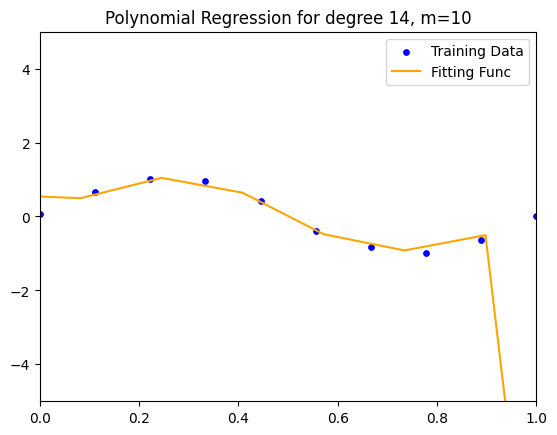

Average of five-fold cross-validation errors is: 763.569004115939


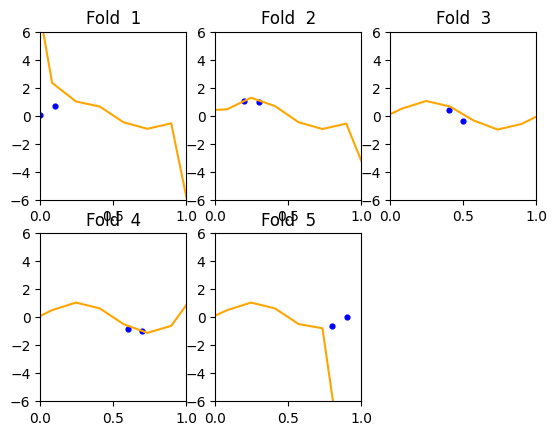

Training error with degree 14 is: 0.0012791428322350444


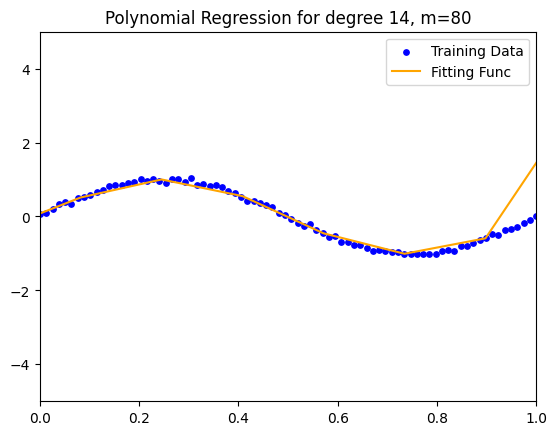

Average of five-fold cross-validation errors is: 115.06234489027081


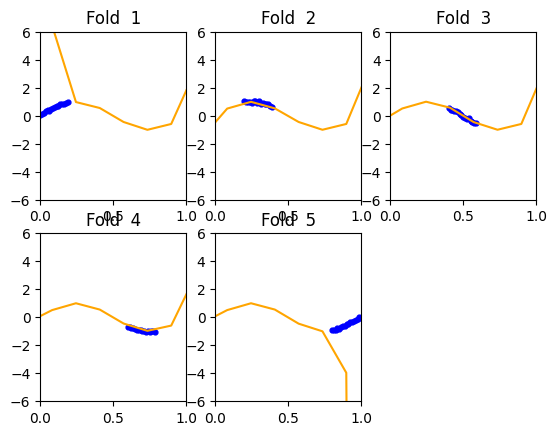

Training error with degree 14 is: 0.0014250403828990161


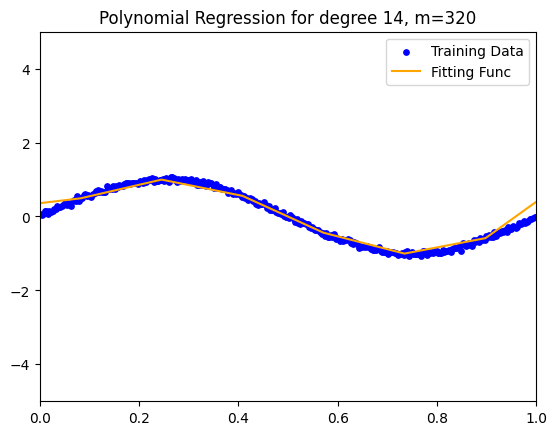

Average of five-fold cross-validation errors is: 46.34398541304866


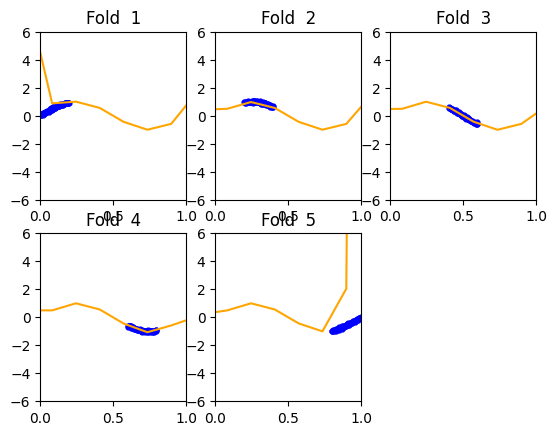

In [ ]:
def draw_img_Q5(x, y, w, deg, m):           
    plt.title("Polynomial Regression for degree " + str(deg) + ', m=' + str(m))
    plt.xlim(0, 1)
    plt.ylim(-5, 5)
    plt.scatter(x, y, s=15, c='b')
    x_c = np.linspace(-4, 4)
    func = np.poly1d(w)
    y_c = func(x_c)
    plt.plot(x_c, y_c, c='orange')
    plt.legend(["Training Data", "Fitting Func"])
    plt.show()

if __name__ == '__main__':

  # m = 10
  x_data, y_data = q5_data_generator(10) 
  x_matrix, w_matrix = poly_regression(x_data, y_data, 14)
  print("Training error with degree 14 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q5(x_data, y_data, w_matrix, 14, 10)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_poly(x_matrix, y_data)))
  plt.show()

  # m = 80
  x_data, y_data = q5_data_generator(80) 
  x_matrix, w_matrix = poly_regression(x_data, y_data, 14)
  print("Training error with degree 14 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q5(x_data, y_data, w_matrix, 14, 80)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_poly(x_matrix, y_data)))
  plt.show()

  # m = 320
  x_data, y_data = q5_data_generator(320) 
  x_matrix, w_matrix = poly_regression(x_data, y_data, 14)
  print("Training error with degree 14 is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q5(x_data, y_data, w_matrix, 14, 320)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_poly(x_matrix, y_data)))
  plt.show()


# Question 6:
Following 4), perform polynomial regression of degree 14 via regularization.
Compare the results by setting λ = 0, 0.001/m , 1/m, 1000/m , where m = 15 is the
number of data points (with x = 0, 1/(m−1) , 2/(m−1), . . . , 1). Show the five-fold
cross-validation errors and the fitting plots.

## 在原  polynomial regression 中加入 regularization
公式如圖:

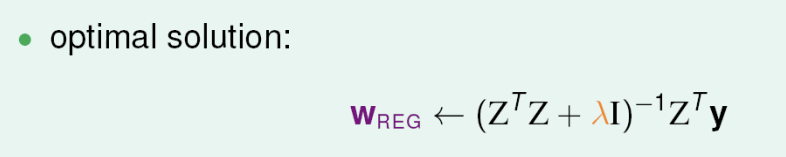

In [ ]:
def poly_regression_regularization(z_data, y_data, degree, lam):
    w_0 = np.ones((1, z_data.size))
    z = np.vstack([z_data, w_0])
    for i in range(1, degree):
        temp = np.power(z_data, i+1)
        z = np.vstack([temp, z])
    z = z.T
    w_reg = np.dot(np.dot(np.linalg.inv(np.dot(z.T, z) + lam * np.identity(z.shape[1])),z.T),y_data.T)
    return z, w_reg


## five-fold cross-validation error with regularization

In [ ]:
def fivefold_reg(x, y, lam): 
    fold_num = int(len(x)/5)
    error_sum = 0
    for i in range(5):
        x_train = np.vstack([x[:i * fold_num], x[i * fold_num + fold_num:]])
        y_train = np.append(y[:i * fold_num], y[i * fold_num + fold_num:])
        w = np.dot(np.dot(np.linalg.pinv(np.dot(x_train.T, x_train) + lam * np.identity(x_train.shape[1])), x_train.T), y_train.T)
        x_valid = x[i * fold_num: i * fold_num + fold_num]
        y_valid = y[i * fold_num: i * fold_num + fold_num]
        predict=np.dot(x_valid, w)

        #設定預測結果子圖
        x_val=[]
        for j in range(fold_num):
          x_val=np.append(x_val,(i*fold_num+j)*(1/len(x)))
        x_c = np.linspace(-4, 4)
        func = np.poly1d(w)
        y_c = func(x_c)
        ax = plt.subplot(2, 3, i+1)
        ax.set_xlim([0, 1])
        ax.set_ylim([-6, 6])
        plt.scatter(x_val, y_valid, s=12, marker="o", c='b')
        plt.plot(x_c, y_c, c='orange')
        #plt.legend(["GT","Predict"])
        plt.title('Fold  '+ str(i+1))
        error_sum += np.linalg.norm(np.dot(x_valid, w) - y_valid)**2 / x_valid.shape[0]
    return error_sum/5

## Q6 Main Function

[0.         0.07142857 0.14285714 0.21428571 0.28571429 0.35714286
 0.42857143 0.5        0.57142857 0.64285714 0.71428571 0.78571429
 0.85714286 0.92857143 1.        ]
Training error is: 0.052401393950380674


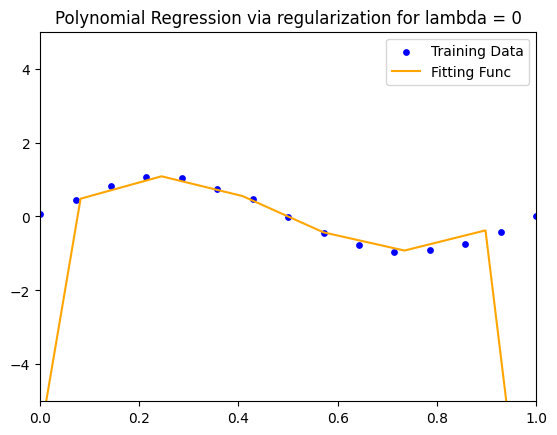

Average of five-fold cross-validation errors is: 5.6544881208818145


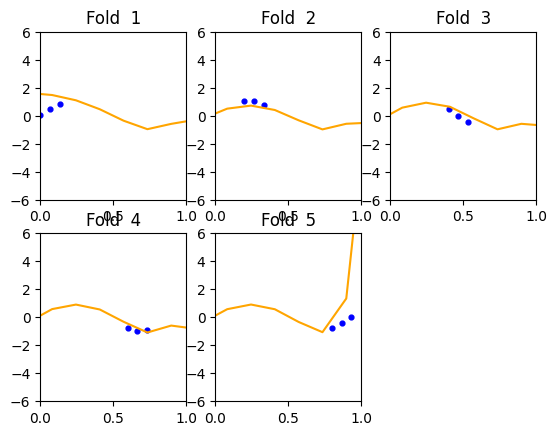

Training error is: 0.0017816580591145414


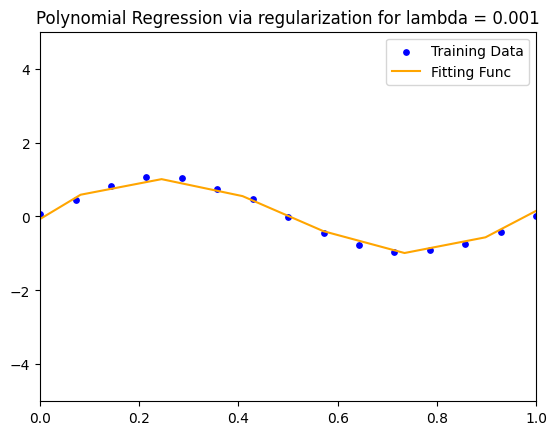

Average of five-fold cross-validation errors is: 5.6544881208818145


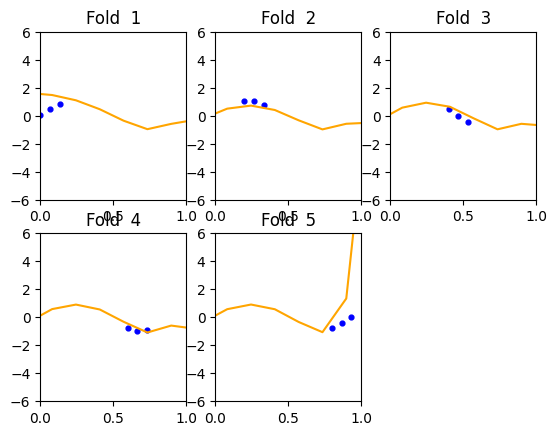

Training error is: 0.10800157867258543


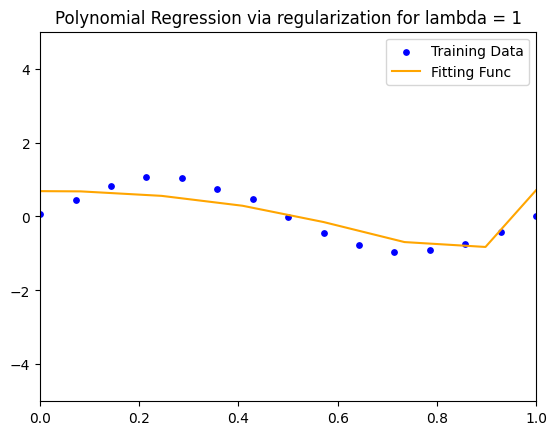

Average of five-fold cross-validation errors is: 0.7369830717077905


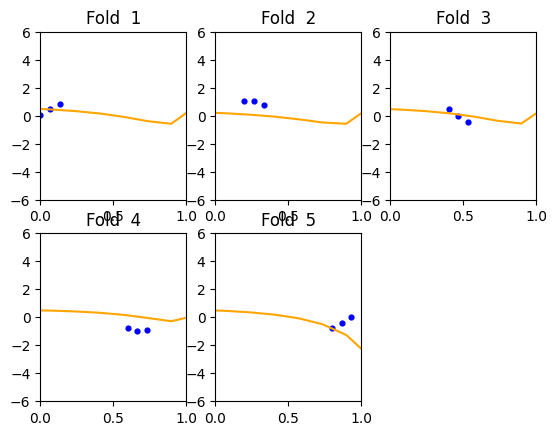

Training error is: 0.45298082419246516


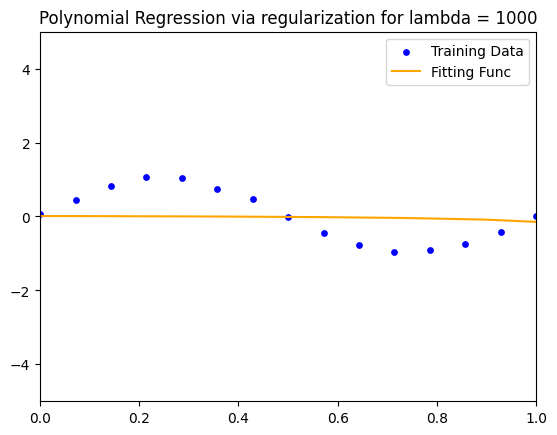

Average of five-fold cross-validation errors is: 0.4815127337366357


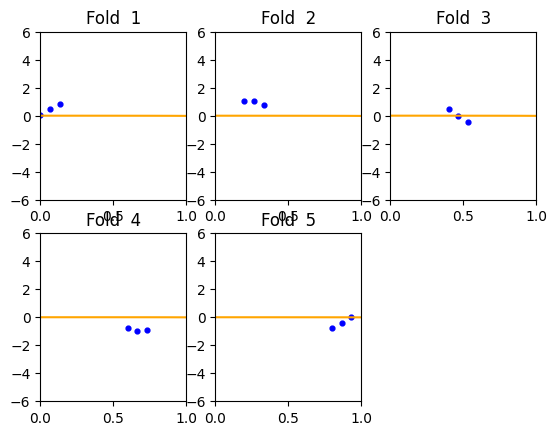

In [ ]:
def draw_img_Q6(x, y, w, lam):             
    plt.title("Polynomial Regression via regularization for lambda = {arg_lam}".format(arg_lam=lam))
    plt.xlim(0, 1)
    plt.ylim(-5, 5)
    plt.scatter(x, y, s=15, marker="o", c='b')
    x_c = np.linspace(-4, 4)
    func = np.poly1d(w)
    y_c = func(x_c)
    plt.plot(x_c, y_c, c='orange')
    plt.legend(["Training Data", "Fitting Func"])
    plt.show()

if __name__ == '__main__':
  m = 15
  x_data, y_data = q5_data_generator(m)
  print(x_data)
  # lambda = 0
  x_matrix, w_matrix = poly_regression_regularization(x_data, y_data, 14, 0)
  print("Training error is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q6(x_data, y_data, w_matrix, 0)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_reg(x_matrix, y_data, 0.001)))
  plt.show()
  # lambda = 0.001
  x_matrix, w_matrix = poly_regression_regularization(x_data, y_data, 14, 0.001/m)
  print("Training error is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q6(x_data, y_data, w_matrix, 0.001)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_reg(x_matrix, y_data, 0.001)))
  plt.show()

  # lambda = 1
  x_matrix, w_matrix = poly_regression_regularization(x_data, y_data, 14, 1/m)
  print("Training error is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q6(x_data, y_data, w_matrix, 1)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_reg(x_matrix, y_data, 1)))
  plt.show()

  # lambda = 1000
  x_matrix, w_matrix = poly_regression_regularization(x_data, y_data, 14, 1000/m)
  print("Training error is: " + str(error_calculation(x_matrix, y_data, w_matrix)))
  draw_img_Q6(x_data, y_data, w_matrix, 1000)
  print("Average of five-fold cross-validation errors is: " + str(fivefold_reg(x_matrix, y_data, 1000)))
  plt.show()